**Analyzing COVID-19 Impact on Unemployment in India**

*Objective:*

The primary aim of this analysis is to assess the repercussions of the COVID-19 pandemic on India's job market. The dataset under consideration contains crucial information about the unemployment rates across various Indian states. The dataset encompasses key indicators such as States, Date, Measuring Frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%).

*Dataset Details:*

The dataset provides insights into the unemployment scenario across different Indian states:

* States: The states within India.
* Date: The date when the unemployment rate was recorded.
* Measuring Frequency: The frequency at which measurements were taken (Monthly).
* Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.
* Estimated Employed Individuals: The count of people currently employed.
* Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.

This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country. The analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.


Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import calendar

Loading the dataset into pandas dataframe

In [31]:
df = pd.read_csv('Unemployment_in_India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Basic information about the dataset

In [19]:
df

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Region                          740 non-null    object 
 1   Date                            740 non-null    object 
 2   Frequency                       740 non-null    object 
 3   Estimated Unemployment Rate     740 non-null    float64
 4   Estimated Employed              740 non-null    float64
 5   Estimated Labour Participation  740 non-null    float64
 6   Area                            740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


Checking for null values

In [21]:
df.isnull().sum()

Region                            14
Date                              14
Frequency                         14
Estimated Unemployment Rate       14
Estimated Employed                14
Estimated Labour Participation    14
Area                              14
dtype: int64

Formatting the columns and their datatypes

In [24]:
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [32]:
import datetime as dt

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [33]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation,Area,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


**Exploratory data analysis**

Basic statistics

In [35]:
df_stat = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation']]
print(round(df_stat.describe().T, 2))

                                count        mean         std       min  \
Estimated Unemployment Rate     740.0       11.79       10.72      0.00   
Estimated Employed              740.0  7204460.03  8087988.43  49420.00   
Estimated Labour Participation  740.0       42.63        8.11     13.33   

                                       25%         50%          75%  \
Estimated Unemployment Rate           4.66        8.35        15.89   
Estimated Employed              1190404.50  4744178.50  11275489.50   
Estimated Labour Participation       38.06       41.16        45.50   

                                        max  
Estimated Unemployment Rate           76.74  
Estimated Employed              45777509.00  
Estimated Labour Participation        72.57  


In [37]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 
                                       'Estimated Labour Participation']].mean().reset_index()
print(round(region_stats, 2))

              Region  Estimated Unemployment Rate  Estimated Employed  \
0     Andhra Pradesh                         7.48          8154093.18   
1              Assam                         6.43          5354772.15   
2              Bihar                        18.92         12366189.14   
3         Chandigarh                        15.99           316831.25   
4       Chhattisgarh                         9.24          4303498.57   
5              Delhi                        16.50          2627512.86   
6                Goa                         9.27           226308.33   
7            Gujarat                         6.66         11402012.79   
8            Haryana                        26.28          3557072.46   
9   Himachal Pradesh                        18.54          1059823.71   
10   Jammu & Kashmir                        16.19          1799931.67   
11         Jharkhand                        20.58          4469240.43   
12         Karnataka                         6.68  

/tmp/ipykernel_15883/3637188733.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed',


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap

<Axes: >

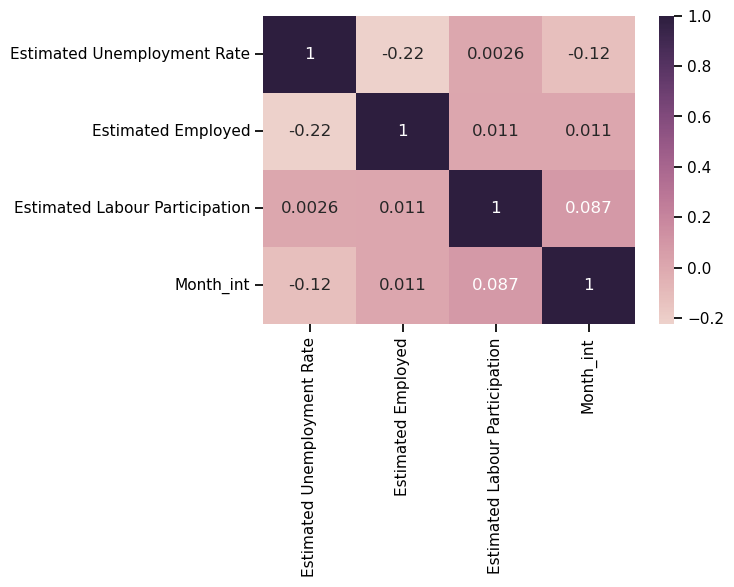

In [39]:
hm = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation', 'Month_int']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

Boxplot of Unemployment rate per States

In [41]:
import plotly.express as px
fig = px.box(df, x='Region', y='Estimated Unemployment Rate', color='Region', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Scatter matrix cosidering the employed and unemployed rates

In [42]:
fig = px.scatter_matrix(df,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                                          'Estimated Labour Participation'],color='Region')
fig.show()

Bar plot showing the average unemployment rate in each state

In [44]:
plot_unemp = df[['Estimated Unemployment Rate','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

/tmp/ipykernel_15883/2484706872.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Haryana and Jharkhand have long been the most unemployed.

Bar chart showing the unemployment rate across regions from Jan. 2020 to Oct. 2020

In [46]:
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='Region',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

We see that during the month of April, the states Puducherry, Tamil Nadu, Jharkhand, Bihar, Tripura, Haryana of India saw the major unemplyment hike.


Sunburst chart showing the unemployment rate in each Region and State

The northern regions of India seems to have more unemployed people.

In [48]:
# Filtering data for the period before the lockdown (January to April)
bf_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

# Filtering data for the lockdown period (April to July)
lockdown = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]

# Calculating the mean unemployment rate before lockdown by state
m_bf_lock = bf_lockdown.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
m_lock = lockdown.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
m_lock['Unemployment Rate before lockdown'] = m_bf_lock['Estimated Unemployment Rate']

m_lock.columns = ['Region','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
m_lock.head()

/tmp/ipykernel_15883/14790586.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_15883/14790586.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Region,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [50]:
# percentage change in unemployment rate

m_lock['Percentage change in Unemployment'] = round(m_lock['Unemployment Rate after lockdown'] - m_lock['Unemployment Rate before lockdown']/m_lock['Unemployment Rate before lockdown'],2)
plot_per = m_lock.sort_values('Percentage change in Unemployment')


# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='Region',y='Percentage change in Unemployment',color='Percentage change in Unemployment',
            title='Percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

The most affected states/territories in India during the lockdown in case of unemployment were:
* Tripura
* Haryana
* Bihar
* Puducherry
* Jharkhand
* Jammu & Kashmir
* Delhi